# Importing the Libraries

In [2]:
import os
import cv2
import math
import glob
import random 
import imageio
import numpy as np
import pandas as pd
from tqdm import tqdm
import tensorflow as tf
import keras.backend as K
import matplotlib.cm as cm
from tensorflow import keras
from PIL import Image as img
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing import image
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import  Dense, Input, InputLayer, Flatten, Conv2D, MaxPooling2D, Dropout

# Data Preprocessing

In [ ]:
correct_image_list = glob.glob('/content/drive/MyDrive/SendO2/Train/correct/*.jpg')

wrong_image_list = glob.glob('/content/drive/MyDrive/SendO2/Train/wrong/*.jpg')

In [ ]:
len(correct_image_list) + len(wrong_image_list)

1527

In [ ]:
X = []
label = []
data = []

for i in tqdm(correct_image_list):
  img_arr = cv2.imread(i)
  img_arr = cv2.resize(img_arr, (250, 250))
  data.append([img_arr, 1])



 
print("\nLoaded Correct Images")

100%|██████████| 1365/1365 [05:39<00:00,  4.02it/s]


Loaded Correct Images


In [ ]:
for i in tqdm(wrong_image_list):
  img_arr2 = cv2.imread(i)
  img_arr2 = cv2.resize(img_arr2, (250, 250))
  data.append([img_arr2, 0])


print("\nLoaded wrong Images")

100%|██████████| 162/162 [00:39<00:00,  4.07it/s]


Loaded wrong Images


In [ ]:
len(data)

1527

In [ ]:
#shuffling the dataset

random.shuffle(data)

In [ ]:
X = []
y = []

for features, labels in data:
  X.append(features)
  y.append(labels)

In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
#Feature Scaling

X = X/255

# Building the model

In [ ]:
model = Sequential()

#Adding first convolutional layer
model.add(Conv2D(64, (3,3), activation="relu"))

#Adding maxpooling
model.add(MaxPooling2D((2,2)))

#Adding second convolutional layer and maxpooling
model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPooling2D((2,2)))

#Adding third convolutional layer and maxpooling
model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPooling2D((2,2)))

#Adding fourth convolutional layer and maxpooling
model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPooling2D((2,2)))

#Adding fifth convolutional layer and maxpooling
model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPooling2D((2,2)))

#Flattening the layers
model.add(Flatten())

model.add(Dense(128, input_shape = X.shape[1:], activation="relu"))

#Output Layer. Since, the image is right/wrong, only 2 neurons is needed.
model.add(Dense(2, activation = "softmax"))
# model.add(Dense(2, activation = "sigmoid"))

In [ ]:
# sparse_categorical_crossentropy because of the 2 neurons in the output layer.
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [ ]:
history = model.fit(X, y, epochs = 6, validation_split=0.2)

Epoch 1/6
39/39 [==============================] - 202s 5s/step - loss: 0.4096 - accuracy: 0.8908 - val_loss: 0.2209 - val_accuracy: 0.9542
Epoch 2/6
39/39 [==============================] - 201s 5s/step - loss: 0.2492 - accuracy: 0.9337 - val_loss: 0.2237 - val_accuracy: 0.9477
Epoch 3/6
39/39 [==============================] - 201s 5s/step - loss: 0.2177 - accuracy: 0.9569 - val_loss: 0.1854 - val_accuracy: 0.9542
Epoch 4/6
39/39 [==============================] - 200s 5s/step - loss: 0.1802 - accuracy: 0.9528 - val_loss: 0.1784 - val_accuracy: 0.9542
Epoch 5/6
39/39 [==============================] - 200s 5s/step - loss: 0.2004 - accuracy: 0.9425 - val_loss: 0.1759 - val_accuracy: 0.9542
Epoch 6/6
39/39 [==============================] - 200s 5s/step - loss: 0.1834 - accuracy: 0.9465 - val_loss: 0.1779 - val_accuracy: 0.9542


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 248, 248, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 124, 124, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 122, 122, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 61, 61, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 59, 59, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 29, 29, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 27, 27, 64)        3

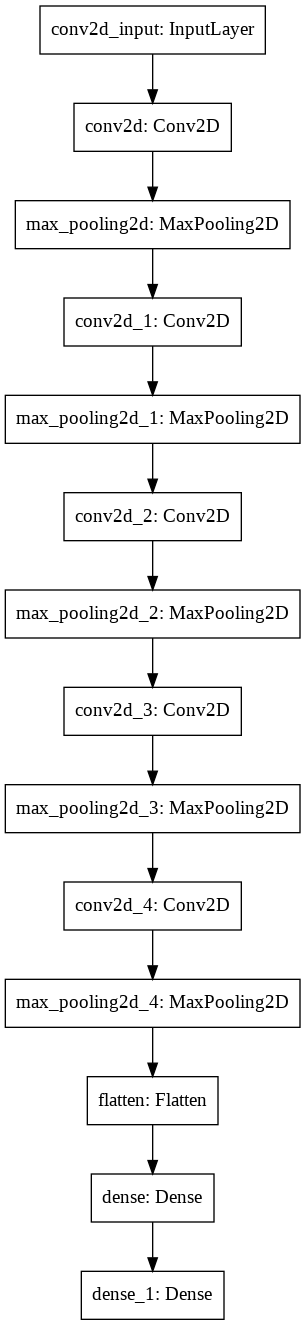

In [ ]:
tf.keras.utils.plot_model(model)

Text(0.5, 1.0, 'Training and validation loss')

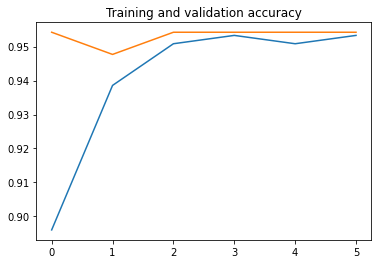

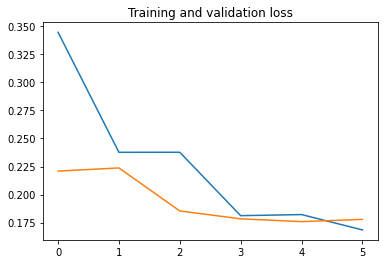

In [ ]:
acc = history.history['accuracy']
val_acc = history.history[ 'val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

In [ ]:
test_images = glob.glob("/content/drive/MyDrive/SendO2/Test/wrong/*.jpg")
CATEGORIES = ["wrong", "right"]

# Saving the model

In [ ]:
# Saving the model :
model.save("/content/drive/MyDrive/uncropped_working_model")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/uncropped_working_model/assets


In [3]:
#Restoring the model : 
model = tf.keras.models.load_model('/content/drive/MyDrive/uncropped_working_model')

# Running and Testing the model

In [ ]:
test_correct = glob.glob('/content/drive/MyDrive/SendO2/Test/correct/*.jpg')
test_wrong = glob.glob('/content/drive/MyDrive/SendO2/Test/wrong/*.jpg')

X_test = []
y_test = []
label_test = []
data_test = []

for i in tqdm(test_correct):
  img_arr = cv2.imread(i)
  img_arr = cv2.resize(img_arr, (250, 250))
  data_test.append([img_arr, 1])


print("\nLoaded Correct Images")

for i in tqdm(test_wrong):
  img_arr2 = cv2.imread(i)
  img_arr2 = cv2.resize(img_arr2, (250, 250))
  data_test.append([img_arr2, 0])


print("\nLoaded wrong Images")

for features, labels in data_test:
  X_test.append(features)
  y_test.append(labels)

X_test = np.array(X_test)
y_test = np.array(y_test)

X = X/255

  0%|          | 0/19 [00:00<?, ?it/s]


Loaded Correct Images


100%|██████████| 19/19 [00:05<00:00,  3.46it/s]



Loaded wrong Images


In [ ]:
#Test data evaluation
results = model.evaluate(X_test, y_test, batch_size=32)
print("test accuracy:", results[1])

2/2 [==============================] - 3s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000
test accuracy: 1.0


In [ ]:
#First type : Running the model with button

from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()
CATEGORIES = ["wrong", "right"]
a = []
fin = []

for fn in uploaded.keys():
  print("\n\nThe following image is uploaded : ")

  rim = cv2.imread(fn)
  re_sh = cv2.resize(rim, (250, 250))

  a.append([re_sh, -1])

  for fe, _ in a:
    fin.append(fe)

  test_features1 = np.array(fin)
  test_features1 = test_features1/255


  pred = model.predict(test_features1)
  plt.imshow(mpimg.imread(fn))
  plt.show()


  print("Type of Image --> " , CATEGORIES[pred.argmax()])

  a = []
  fin = []


In [ ]:
#Second type : Keep all the images stored in drive.


a = []
fin = []
for loop in range(len(test_images)):
  rim = cv2.imread(test_images[loop])
  re_sh = cv2.resize(rim, (250, 250))

  a.append([re_sh, -1])

  for fe, _ in a:
    fin.append(fe)

  test_features1 = np.array(fin)
  test_features1 = test_features1/255

  pred = model.predict(test_features1)
  print(CATEGORIES[pred.argmax()])
  # plt.imshow(rim)
  # plt.show()
  a = []
  fin = []

# Visualizing Intermediate Representations

In [ ]:
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

Saving droidcam-20210202-152545.jpg to droidcam-20210202-152545.jpg


The following image is uploaded : 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in true_divide


Type of Image -->  right


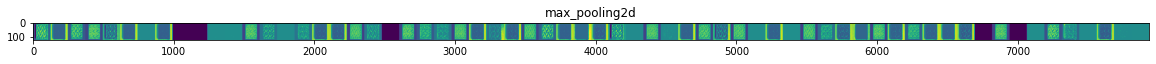

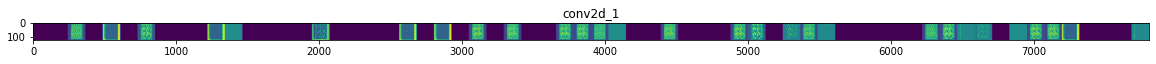

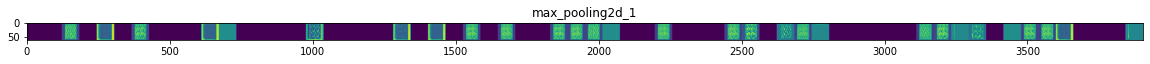

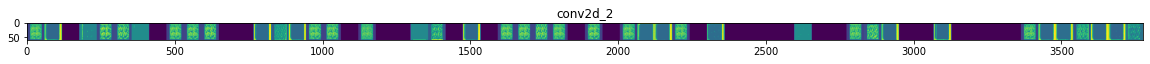

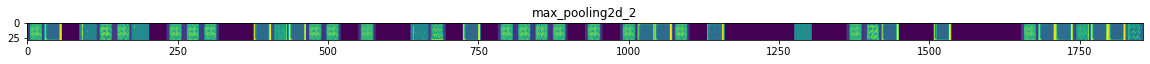

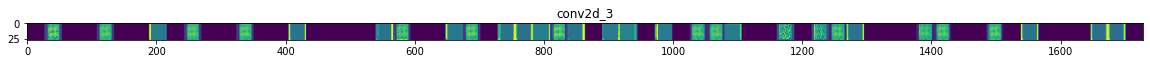

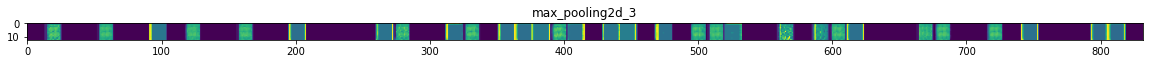

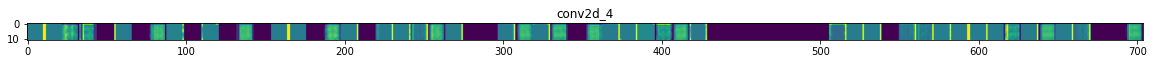

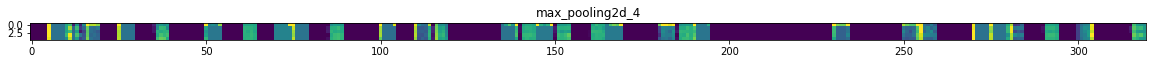

In [ ]:

uploaded = files.upload()
a = []
fin = []

for fn in uploaded.keys():
  print("\n\nThe following image is uploaded : ")

  rim = cv2.imread(fn)
  re_sh = cv2.resize(rim, (250, 250))

  a.append([re_sh, -1])

  for fe, _ in a:
    fin.append(fe)

  test_features1 = np.array(fin)
  test_features1 = test_features1/255


  pred = model.predict(test_features1)

  # running the image through the network to get intermediate representations for this image.
  successive_feature_maps = visualization_model.predict(test_features1)

  # Layer Names
  layer_names = [layer.name for layer in model.layers[1:]]


  for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    if len(feature_map.shape) == 4:
      n_features = feature_map.shape[-1]  # number of features in feature map
      # shape of feature_map --> (1, size, size, n_features)
      size = feature_map.shape[1]
      # tiling the images in this matrix
      display_grid = np.zeros((size, size * n_features))
      for i in range(n_features):
        test_features1 = feature_map[0, :, :, i]
        test_features1 -= test_features1.mean()
        test_features1 /= test_features1.std()
        test_features1 *= 64
        test_features1 += 128
        test_features1 = np.clip(test_features1, 0, 255).astype('uint8')
        # grid tiling
        display_grid[:, i * size : (i + 1) * size] = test_features1
      # Displaying the grid
      scale = 20. / n_features
      plt.figure(figsize=(scale * n_features, scale))
      plt.title(layer_name)
      plt.grid(False)
      plt.imshow(display_grid, aspect='auto', cmap='viridis')

  print("Type of Image --> " , CATEGORIES[pred.argmax()])

  a = []
  fin = []

# GradCAM (Not Done)

In [ ]:
# cam = GradCAM(model, i)

In [7]:
import sys
import keras
from keras.applications.vgg16 import (
    VGG16, preprocess_input, decode_predictions)
from keras.preprocessing import image
from keras.layers.core import Lambda
from keras.models import Sequential
from tensorflow.python.framework import ops


# uploaded = files.upload()

# for fn in uploaded.keys():
#   print("\n\nThe following image is uploaded : ")


#   def target_category_loss(x, category_index, nb_classes):
#       return tf.multiply(x, K.one_hot([category_index], nb_classes))

#   def target_category_loss_output_shape(input_shape):
#       return input_shape

#   def normalize(x):
#       # utility function to normalize a tensor by its L2 norm
#       return x / (K.sqrt(K.mean(K.square(x))) + 1e-5)

#   def load_image(path):
      
#       img = image.load_img(fn, target_size=(224, 224))
#       x = image.img_to_array(img)
#       x = np.expand_dims(x, axis=0)
#       x = preprocess_input(x)
#       return x

#   def register_gradient():
#       if "GuidedBackProp" not in ops._gradient_registry._registry:
#           @ops.RegisterGradient("GuidedBackProp")
#           def _GuidedBackProp(op, grad):
#               dtype = op.inputs[0].dtype
#               return grad * tf.cast(grad > 0., dtype) * \
#                   tf.cast(op.inputs[0] > 0., dtype)

#   def compile_saliency_function(model, activation_layer='block5_conv3'):
#       input_img = model.input
#       layer_dict = dict([(layer.name, layer) for layer in model.layers[1:]])
#       layer_output = layer_dict[activation_layer].output
#       max_output = K.max(layer_output, axis=3)
#       saliency = K.gradients(K.sum(max_output), input_img)[0]
#       return K.function([input_img, K.learning_phase()], [saliency])

#   def modify_backprop(model, name):
#       g = tf.get_default_graph()
#       with g.gradient_override_map({'Relu': name}):

#           # get layers that have an activation
#           layer_dict = [layer for layer in model.layers[1:]
#                         if hasattr(layer, 'activation')]

#           # replace relu activation
#           for layer in layer_dict:
#               if layer.activation == keras.activations.relu:
#                   layer.activation = tf.nn.relu

#           # re-instanciate a new model
#           new_model = VGG16(weights='imagenet')
#       return new_model

#   def deprocess_image(x):
       
#       if np.ndim(x) > 3:
#           x = np.squeeze(x)
#       # normalize tensor: center on 0., ensure std is 0.1
#       x -= x.mean()
#       x /= (x.std() + 1e-5)
#       x *= 0.1

#       # clip to [0, 1]
#       x += 0.5
#       x = np.clip(x, 0, 1)

#       # convert to RGB array
#       x *= 255
#       if K.image_dim_ordering() == 'th':
#           x = x.transpose((1, 2, 0))
#       x = np.clip(x, 0, 255).astype('uint8')
#       return x

#   def grad_cam(input_model, image, category_index, layer_name):
#       # model = Sequential()
#       # model.add(input_model)

#       nb_classes = 1000
#       target_layer = lambda x: target_category_loss(x, category_index, nb_classes)
#       model.add(Lambda(target_layer,
#                       output_shape = target_category_loss_output_shape))

#       loss = K.sum(model.layers[-1].output)
#       conv_output =  [l for l in model.layers[0].layers if l.name is layer_name][0].output
#       grads = normalize(K.gradients(loss, conv_output)[0])
#       gradient_function = K.function([model.layers[0].input], [conv_output, grads])

#       output, grads_val = gradient_function([image])
#       output, grads_val = output[0, :], grads_val[0, :, :, :]

#       weights = np.mean(grads_val, axis = (0, 1))
#       cam = np.ones(output.shape[0 : 2], dtype = np.float32)

#       for i, w in enumerate(weights):
#           cam += w * output[:, :, i]

#       cam = cv2.resize(cam, (224, 224))
#       cam = np.maximum(cam, 0)
#       heatmap = cam / np.max(cam)

#       #Return to BGR [0..255] from the preprocessed image
#       image = image[0, :]
#       image -= np.min(image)
#       image = np.minimum(image, 255)

#       cam = cv2.applyColorMap(np.uint8(255*heatmap), cv2.COLORMAP_JET)
#       cam = np.float32(cam) + np.float32(image)
#       cam = 255 * cam / np.max(cam)
#       return np.uint8(cam), heatmap

# preprocessed_input = load_image(fn)

# predictions = model.predict(preprocessed_input)
# top_1 = decode_predictions(predictions)[0][0]
# print('Predicted class:')
# print('%s (%s) with probability %.2f' % (top_1[1], top_1[0], top_1[2]))

# predicted_class = np.argmax(predictions)
# cam, heatmap = grad_cam(model, preprocessed_input, predicted_class, "block5_conv3")
# cv2.imwrite("gradcam.jpg", cam)

# register_gradient()
# guided_model = modify_backprop(model, 'GuidedBackProp')
# saliency_fn = compile_saliency_function(guided_model)
# saliency = saliency_fn([preprocessed_input, 0])
# gradcam = saliency[0] * heatmap[..., np.newaxis]
# cv2.imwrite("guided_gradcam.jpg", deprocess_image(gradcam))

In [12]:
# last_conv_layer_name = "block14_sepconv2_act"

In [14]:
model_builder = keras.applications.xception.Xception
img_size = (224, 224)
preprocess_input = keras.applications.xception.preprocess_input
decode_predictions = keras.applications.xception.decode_predictions
model_temp = model
model_temp.layers[-1].activation = None
last_conv_layer_name =model.layers[-1].name

In [15]:

def get_img_array(img_path, size):
    img = keras.preprocessing.image.load_img(img_path, target_size=size)
    array = keras.preprocessing.image.img_to_array(img)
    array = np.expand_dims(array, axis=0)
    return array


def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        if len(preds) == 1:
          class_channel = preds[0]
        else:
          class_channel = preds[:, pred_index]
  

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

In [4]:
# def get_img_array(img_path, size):
#     # `img` is a PIL image of size 299x299
#     img = keras.preprocessing.image.load_img(img_path, target_size=size)
#     # `array` is a float32 Numpy array of shape (299, 299, 3)
#     array = keras.preprocessing.image.img_to_array(img)
#     # We add a dimension to transform our array into a "batch"
#     # of size (1, 299, 299, 3)
#     array = np.expand_dims(array, axis=0)
#     return array


# def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
#     # First, we create a model that maps the input image to the activations
#     # of the last conv layer as well as the output predictions
#     grad_model = tf.keras.models.Model(
#         [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
#     )

#     # Then, we compute the gradient of the top predicted class for our input image
#     # with respect to the activations of the last conv layer
#     with tf.GradientTape() as tape:
#         last_conv_layer_output, preds = grad_model(img_array)

#         if pred_index is None:
#             pred_index = tf.argmax(preds[0])
#         if len(preds) == 1:
#             class_channel = preds[0]
#         else:
#             class_channel = preds[:, pred_index]

#     # This is the gradient of the output neuron (top predicted or chosen)
#     # with regard to the output feature map of the last conv layer
#     grads = tape.gradient(class_channel, last_conv_layer_output)

#     # This is a vector where each entry is the mean intensity of the gradient
#     # over a specific feature map channel
#     pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
#     # pooled_grads = tf.reduce_mean(grads)

#     # We multiply each channel in the feature map array
#     # by "how important this channel is" with regard to the top predicted class
#     # then sum all the channels to obtain the heatmap class activation
#     last_conv_layer_output = last_conv_layer_output[0]
#     heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
#     heatmap = tf.squeeze(heatmap)

#     # For visualization purpose, we will also normalize the heatmap between 0 & 1
#     heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
#     return heatmap.numpy()


In [10]:
# # Names of all layers

print([layer.name for layer in model.layers])
last_conv_layer_name = model.layers[-1].name

['conv2d', 'max_pooling2d', 'conv2d_1', 'max_pooling2d_1', 'conv2d_2', 'max_pooling2d_2', 'conv2d_3', 'max_pooling2d_3', 'conv2d_4', 'max_pooling2d_4', 'flatten', 'dense', 'dense_1']


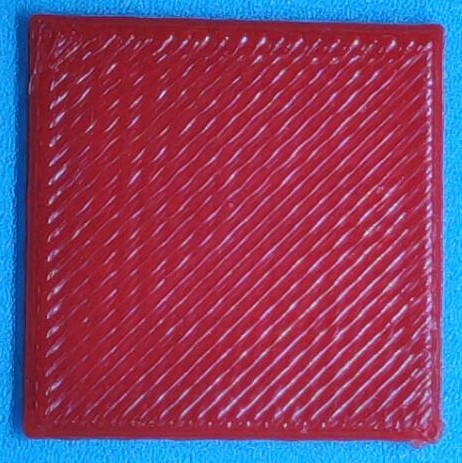

In [5]:
img_path = "/content/drive/MyDrive/SendO2/Train/correct/droidcam-20210128-152301.jpg"

display(Image(img_path))

In [16]:
# Prepare image
# img_array = preprocess_input(get_img_array(img_path, size=img_size))
img_array = preprocess_input(get_img_array(img_path, size=(250, 250)))

# Make model
# model = model_builder(weights="imagenet")

# Remove last layer's softmax
model.layers[-1].activation = None

# Print what the top predicted class is
preds = model.predict(img_array)
# print("Predicted:", decode_predictions(preds, top=1)[0])

# Generate class activation heatmap
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

# Display heatmap
plt.matshow(heatmap)
plt.show()

InvalidArgumentError: ignored

In [ ]:
# last_conv_layer_name = "block14_sepconv2_act"

In [ ]:
# preprocess_input = keras.applications.xception.preprocess_input
# decode_predictions = keras.applications.xception.decode_predictions

# img_size = (250, 250)
# img_array = preprocess_input(get_img_array(img_path, size=img_size))


# # Remove last layer's softmax
# model.layers[-1].activation = None

In [ ]:
# heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

InvalidArgumentError: ignored

In [ ]:
# for idx in range(len(model.layers)):
#   print(model.get_layer(index = idx).name)

conv2d
max_pooling2d
conv2d_1
max_pooling2d_1
conv2d_2
max_pooling2d_2
conv2d_3
max_pooling2d_3
conv2d_4
max_pooling2d_4
flatten
dense
dense_1


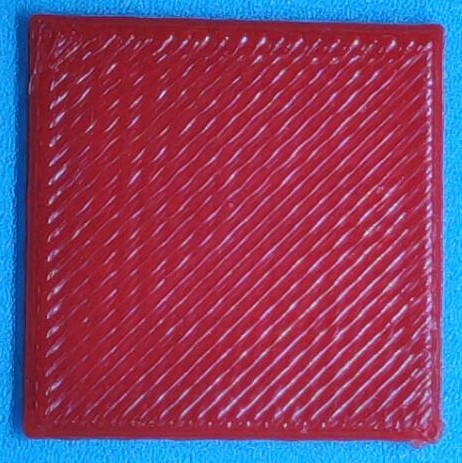

In [ ]:
# model_builder = keras.applications.xception.Xception
# img_size = (250, 250)
# preprocess_input = keras.applications.xception.preprocess_input
# decode_predictions = keras.applications.xception.decode_predictions

# last_conv_layer_name = "dense_1"

# # The local path to our target image
# img_path =  "/content/drive/MyDrive/SendO2/Train/correct/droidcam-20210128-152301.jpg"

# preprocess_input = keras.applications.xception.preprocess_input
# decode_predictions = keras.applications.xception.decode_predictions




# display(Image(img_path))



In [ ]:
def get_img_array(img_path, size):
    # `img` is a PIL image of size 299x299
    img = keras.preprocessing.image.load_img(img_path, target_size=size)
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    array = keras.preprocessing.image.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 299, 299, 3)
    array = np.expand_dims(array, axis=0)
    print(array.shape)
    return array

def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    # pooled_grads = tf.reduce_mean(grads)

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()





In [ ]:
# Prepare image
img_array = preprocess_input(get_img_array(img_path, size=img_size))


# Generate class activation heatmap
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

# Display heatmap
plt.matshow(heatmap)
plt.show()


In [ ]:
X = []
label = []
data = []


img_arr2 = cv2.imread("/content/drive/MyDrive/SendO2/Train/correct/droidcam-20210128-152301.jpg")
img_arr2 = cv2.resize(img_arr2, (250, 250))
# data.append([img_arr, 1])
img_arr2.shape

(250, 250, 3)

In [ ]:
np.expand_dims(img_arr2, axis=0).shape

(1, 250, 250, 3)

In [ ]:
# heatmap = make_gradcam_heatmap(img_arr2, model, last_conv_layer_name)

In [ ]:
# from google.colab import files
# from keras.preprocessing import image
# img_size = (250, 250)
# last_conv_layer_name = "dense_1"

# uploaded = files.upload()
# CATEGORIES = ["wrong", "right"]
# a = []
# fin = []

# for fn in uploaded.keys():
#   print("\n\nThe following image is uploaded : ")

#   rim = cv2.imread(fn)
#   re_sh = cv2.resize(rim, (250, 250))

#   a.append([re_sh, -1])

#   for fe, _ in a:
#     fin.append(fe)

#   test_features1 = np.array(fin)
#   test_features1 = test_features1/255


#   pred = model.predict(test_features1)
#   print(pred)

#   heatmap = make_gradcam_heatmap(test_features1, model, last_conv_layer_name)
 
#   plt.matshow(heatmap)
#   plt.show()


#   print("Type of Image --> " , CATEGORIES[pred.argmax()])

#   a = []
#   fin = []


In [ ]:
from tensorflow.keras.models import Model
import tensorflow as tf
import numpy as np
import cv2

class GradCAM:
    def __init__(self, model, classIdx, layerName=None):
        # store the model, the class index used to measure the class
        # activation map, and the layer to be used when visualizing
        # the class activation map
        self.model = model
        self.classIdx = classIdx
        self.layerName = layerName
        # if the layer name is None, attempt to automatically find
        # the target output layer
        if self.layerName is None:
            self.layerName = self.find_target_layer()

    def find_target_layer(self):
        # attempt to find the final convolutional layer in the network
        # by looping over the layers of the network in reverse order
        for layer in reversed(self.model.layers):
            # check to see if the layer has a 4D output
            if len(layer.output_shape) == 4:
                return layer.name
        # otherwise, we could not find a 4D layer so the GradCAM
        # algorithm cannot be applied
        raise ValueError("Could not find 4D layer. Cannot apply GradCAM.")


    def compute_heatmap(self, image, eps=1e-8):
        # construct our gradient model by supplying (1) the inputs
        # to our pre-trained model, (2) the output of the (presumably)
        # final 4D layer in the network, and (3) the output of the
        # softmax activations from the model
        gradModel = Model(
            inputs=[self.model.inputs],
            outputs=[self.model.get_layer(self.layerName).output, self.model.output])

        # record operations for automatic differentiation
        with tf.GradientTape() as tape:
            # cast the image tensor to a float-32 data type, pass the
            # image through the gradient model, and grab the loss
            # associated with the specific class index
            inputs = tf.cast(image, tf.float32)
            (convOutputs, predictions) = gradModel(inputs)
            
            loss = predictions[:, tf.argmax(predictions[0])]
    
        # use automatic differentiation to compute the gradients
        grads = tape.gradient(loss, convOutputs)

        # compute the guided gradients
        castConvOutputs = tf.cast(convOutputs > 0, "float32")
        castGrads = tf.cast(grads > 0, "float32")
        guidedGrads = castConvOutputs * castGrads * grads
        # the convolution and guided gradients have a batch dimension
        # (which we don't need) so let's grab the volume itself and
        # discard the batch
        convOutputs = convOutputs[0]
        guidedGrads = guidedGrads[0]

        # compute the average of the gradient values, and using them
        # as weights, compute the ponderation of the filters with
        # respect to the weights
        weights = tf.reduce_mean(guidedGrads, axis=(0, 1))
        cam = tf.reduce_sum(tf.multiply(weights, convOutputs), axis=-1)

        # grab the spatial dimensions of the input image and resize
        # the output class activation map to match the input image
        # dimensions
        (w, h) = (image.shape[2], image.shape[1])
        heatmap = cv2.resize(cam.numpy(), (w, h))
        # normalize the heatmap such that all values lie in the range
        # [0, 1], scale the resulting values to the range [0, 255],
        # and then convert to an unsigned 8-bit integer
        numer = heatmap - np.min(heatmap)
        denom = (heatmap.max() - heatmap.min()) + eps
        heatmap = numer / denom
        heatmap = (heatmap * 255).astype("uint8")
        # return the resulting heatmap to the calling function
        return heatmap

    def overlay_heatmap(self, heatmap, image, alpha=0.5,
                        colormap=cv2.COLORMAP_VIRIDIS):
        # apply the supplied color map to the heatmap and then
        # overlay the heatmap on the input image
        heatmap = cv2.applyColorMap(heatmap, colormap)
        output = cv2.addWeighted(image, alpha, heatmap, 1 - alpha, 0)
        # return a 2-tuple of the color mapped heatmap and the output,
        # overlaid image
        return (heatmap, output)

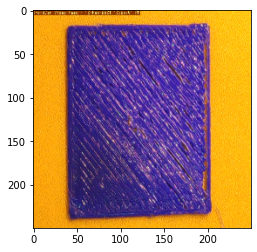

InvalidArgumentError: ignored

In [ ]:
image = cv2.imread("/content/drive/MyDrive/SendO2/Test/wrong/droidcam-20210212-122501.jpg")
# image = cv2.bitwise_not(image)          # ATTENTION 
image = cv2.resize(image, (250, 250))

# checking how it looks 
plt.imshow(image, cmap="gray")
plt.show()

image = tf.expand_dims(image, axis=-1)      
image = tf.divide(image, 255)              # normalize
image = tf.reshape(image, [1, 250, 250, 1])  # reshape to add batch dimension

print(image.shape) # (1, 250, 250, 1)


In [ ]:
preds = model.predict(image) 
i = np.argmax(preds[0])
i # 0 - great model correctly recognize, this is an odd number 

ValueError: ignored

In [ ]:
image = cv2.imread("/content/drive/MyDrive/SendO2/Train/correct/droidcam-20210128-152301.jpg")
image = cv2.resize(image, (250, 250))
image = image.astype('float32') / 255
image = np.expand_dims(image, axis=0)

preds = model.predict(image) 
i = np.argmax(preds[0])

In [ ]:
icam = GradCAM(model, i, 'dense_1') 
heatmap = icam.compute_heatmap(image)
heatmap = cv2.resize(heatmap, (250, 250))

image = cv2.imread("/content/drive/MyDrive/SendO2/Train/correct/droidcam-20210128-152301.jpg")
image = cv2.resize(image, (250, 250))
print(heatmap.shape, image.shape)

(heatmap, output) = icam.overlay_heatmap(heatmap, image, alpha=0.5)

In [ ]:
a = []
fin = []

fn = "/content/drive/MyDrive/SendO2/Train/correct/droidcam-20210128-152301.jpg"

rim = cv2.imread(fn)
re_sh = cv2.resize(rim, (250, 250))

a.append([re_sh, -1])

for fe, _ in a:
  fin.append(fe)

test_features1 = np.array(fin)
test_features1 = test_features1/255


pred = model.predict(test_features1)
 
icam = GradCAM(model, i, 'dense_1') 
heatmap = icam.compute_heatmap(test_features1)
heatmap = cv2.resize(heatmap, (250, 250))

image = cv2.imread("/content/drive/MyDrive/SendO2/Train/correct/droidcam-20210128-152301.jpg")
image = cv2.resize(image, (250, 250))
print(heatmap.shape, image.shape)

(heatmap, output) = icam.overlay_heatmap(heatmap, image, alpha=0.4)

tf.Tensor([0. 1.], shape=(2,), dtype=float32)
0.49999997
250 250
(1, 250, 250, 3)
()


TypeError: ignored